In [ ]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cs285_f2020` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/Curb'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/Curb'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [ ]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'zlib1g-dev' instead of 'libz-dev'
build-essential is already the newest version (12.4ubuntu1).
libxi6 is already the newest version (2:1.7.9-1).
libxi6 set to manually installed.
libxrandr2 is already the newest version (2:1.5.1-1).
libxrandr2 set to manually installed.
lsb-release is already the newest version (9.20170808ubuntu1).
lsb-release set to manually installed.
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
unzip is already the newest version (6.0-21ubuntu1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
curl is already the newest version (7.58.0-2ubuntu3.10).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
libgl1-mesa-dev set t

In [11]:
%ls

AUDIO/        C0026.MP4     P1000853.JPG  P1022114.MOV  P1022139.MOV
C0014.MP4     C0027M01.XML  P1022090.MOV  P1022115.MOV  P1022140.MOV
C0015M01.XML  C0027.MP4     P1022091.MOV  P1022116.MOV  P1022141.MOV
C0015.MP4     C0028M01.XML  P1022092.MOV  P1022117.MOV  P1022142.MOV
C0016M01.XML  C0028.MP4     P1022093.MOV  P1022118.MOV  P1022143.MOV
C0016.MP4     C0029M01.XML  P1022094.MOV  P1022119.MOV  P1022144.MOV
C0017M01.XML  C0029.MP4     P1022095.MOV  P1022120.MOV  P1022145.MOV
C0017.MP4     C0030M01.XML  P1022096.MOV  P1022121.MOV  P1022146.MOV
C0018M01.XML  C0030.MP4     P1022097.MOV  P1022122.MOV  P1022147.MOV
C0018.MP4     C0031M01.XML  P1022098.MOV  P1022123.MOV  P1022148.MOV
C0019M01.XML  C0031.MP4     P1022099.MOV  P1022124.MOV  P1022149.MOV
C0019.MP4     C0032M01.XML  P1022100.MOV  P1022125.MOV  P1022150.MOV
C0020M01.XML  C0032.MP4     P1022101.MOV  P1022126.MOV  P1022151.MOV
C0020.MP4     C0033M01.XML  P1022102.MOV  P1022127.MOV  P1022152.MOV
C0021M01.XML  C0033.MP4     P10221

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import re
from tqdm import tnrange, tqdm_notebook

In [25]:
!ffmpeg -i C0014.MP4 -vf scale=600:-1 TEST.MP4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [9]:
!pip install ipywebrtc
from ipywebrtc import VideoStream

     |████████████████████████████████| 1.1MB 2.9MB/s 


In [19]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [22]:
!pip install ipywidgets

In [23]:
video = VideoStream.from_file("TEST.MP4")
video

VideoStream(video=Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\…

In [14]:
video == None

False

In [ ]:
raw = cv2.VideoCapture("TEST.MP4")

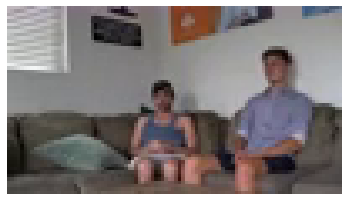

In [ ]:
raw.set(cv2.CAP_PROP_POS_FRAMES,100)
flag, rawframe = raw.read()
plt.imshow(cv2.cvtColor(rawframe, cv2.COLOR_BGR2RGB))
plt.axis("off");

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
def f(x):
  flag, rawframe = raw.read()
  plt.imshow(cv2.cvtColor(rawframe, cv2.COLOR_BGR2RGB))
  plt.axis("off");

In [ ]:
from IPython.display import clear_output, Image

In [ ]:
cap = cv2.VideoCapture("TEST.MP4")
while cap.isOpened():
    ret, image = cap.read()

    if not ret:
      break

    clear_output(wait=True)
    cv2_imshow(image) # Note cv2_imshow, not cv2.imshow

    cv2.waitKey(5) & 0xff

cv2.destroyAllWindows()
cap.release()

KeyboardInterrupt: ignored

In [ ]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

ModuleNotFoundError: ignored

In [ ]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import gym
from cs285.infrastructure.colab_utils import (
    wrap_env,
    show_video
) 

env = wrap_env(gym.make("Ant-v2"))

observation = env.reset()
for i in range(100):
    env.render(mode='rgb_array')
    obs, rew, term, _ = env.step(env.action_space.sample() ) 
    if term:
      break;
            
env.close()
print('Loading video...')
show_video()

Loading video...


## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`cs285_f2020/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

## Run Behavior Cloning (Problem 1)

In [ ]:
#@title imports

import os
import time
import numpy as np

from cs285.infrastructure.rl_trainer import RL_Trainer
from cs285.agents.bc_agent import BCAgent
from cs285.policies.loaded_gaussian_policy import LoadedGaussianPolicy

%load_ext autoreload
%autoreload 2

In [ ]:
#@title runtime arguments

class Args:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  #@markdown expert data
  expert_policy_file = 'cs285/policies/experts/Ant.pkl' #@param
  expert_data = 'cs285/expert_data/expert_data_Ant-v2.pkl' #@param
  env_name = 'Ant-v2' #@param ['Ant-v2', 'Humanoid-v2', 'Walker2d-v2', 'HalfCheetah-v2', 'Hopper-v2']
  exp_name = 'test_bc_ant' #@param
  do_dagger = False #@param {type: "boolean"}
  ep_len = 1000 #@param {type: "integer"}

  num_agent_train_steps_per_iter = 1000 #@param {type: "integer"})
  n_iter = 1 #@param {type: "integer"})

  #@markdown batches & buffers
  batch_size = 1000 #@param {type: "integer"})
  eval_batch_size = 1000 #@param {type: "integer"}
  train_batch_size = 100 #@param {type: "integer"}
  max_replay_buffer_size = 1000000 #@param {type: "integer"}

  #@markdown network
  n_layers = 2 #@param {type: "integer"}
  size = 64 #@param {type: "integer"}
  learning_rate = 5e-3 #@param {type: "number"}

  #@markdown logging
  video_log_freq = 5 #@param {type: "integer"}
  scalar_log_freq = 1 #@param {type: "integer"}

  #@markdown gpu & run-time settings
  no_gpu = False #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}

args = Args()


In [ ]:
#@title define `BC_Trainer`
class BC_Trainer(object):

    def __init__(self, params):
        #######################
        ## AGENT PARAMS
        #######################

        agent_params = {
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            'max_replay_buffer_size': params['max_replay_buffer_size'],
            }

        self.params = params
        self.params['agent_class'] = BCAgent ## TODO: look in here and implement this
        self.params['agent_params'] = agent_params

        ################
        ## RL TRAINER
        ################

        self.rl_trainer = RL_Trainer(self.params) ## TODO: look in here and implement this

        #######################
        ## LOAD EXPERT POLICY
        #######################

        print('Loading expert policy from...', self.params['expert_policy_file'])
        self.loaded_expert_policy = LoadedGaussianPolicy(self.params['expert_policy_file'])
        print('Done restoring expert policy...')

    def run_training_loop(self):

        self.rl_trainer.run_training_loop(
            n_iter=self.params['n_iter'],
            initial_expertdata=self.params['expert_data'],
            collect_policy=self.rl_trainer.agent.actor,
            eval_policy=self.rl_trainer.agent.actor,
            relabel_with_expert=self.params['do_dagger'],
            expert_policy=self.loaded_expert_policy,
        )


In [ ]:
#@title create directory for logging

if args.do_dagger:
    logdir_prefix = 'q2_'  # The autograder uses the prefix `q2_`
    assert args.n_iter>1, ('DAgger needs more than 1 iteration (n_iter>1) of training, to iteratively query the expert and train (after 1st warmstarting from behavior cloning).')
else:
    logdir_prefix = 'q1_'  # The autograder uses the prefix `q1_`
    assert args.n_iter==1, ('Vanilla behavior cloning collects expert data just once (n_iter=1)')

data_path ='/content/cs285_f2020/data'
if not (os.path.exists(data_path)):
    os.makedirs(data_path)
logdir = logdir_prefix + args.exp_name + '_' + args.env_name + \
         '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

In [ ]:
## run training
print(args.logdir)
trainer = BC_Trainer(args)
trainer.run_training_loop()

/content/cs285_f2020/data/q1_test_bc_ant_Ant-v2_04-09-2020_20-17-34
########################
logging outputs to  /content/cs285_f2020/data/q1_test_bc_ant_Ant-v2_04-09-2020_20-17-34
########################
GPU not detected. Defaulting to CPU.


NotImplementedError: ignored

In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

%load_ext tensorboard
%tensorboard --logdir /content/cs285_f2020/data

## Running DAgger (Problem 2)
Modify the settings above:
1. check the `do_dagger` box
2. set `n_iters` to `10`
and then rerun the code.